## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount("/content/drive")

DATA_PATH = '/content/drive/Mydrive/Colab Notebooks/..../''

csv(data

In [2]:
train= pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test=pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
submission=pd.read_csv("sampleSubmission.csv")
submission.head(1)

,datetime,count
0,2011-01-20 00:00:00,0


분류는 높게 나오면 좋다?
수치는 낮게 나요면 좋다?
reaserch paper 백그라운드 환경, 날씨 같은 것을 알려준다.

## 탐색적 자료 분석

- datatime : 1시간 간격 데이터 수집
-season
  + 1 : 봄, 2: 여름, 3 : 가을, 4 : 겨울
- holiday
  + 0 : 공휴일 아님, 1: 공휴일
- workingday
  + 0 : 평일이 아님, 1 : 평일
- weather
  +1 : 맑음, 2 : 약간 흐림, 3: 약한 눈, 비,  4 : 폭우 , 폭설 (기상이 매우 안 좋은 상태)
- 종속변수 : count(자전거 대여 수량

## 문제 정의
- 각 시간대별로 자전거 대여 수량을 예측하세요!

## 데이터 확인
- casual, registered가 훈련데이터에 존재, 테스트 데이터에는 현재 없는 상황
  + casual : 비회원 수
  + registered : 회원

## 날짜 데이터 변환

In [5]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])  # 날짜 부분만 분리
train['year'] = train['date'].apply(lambda x: x.split('-')[0])  # 연도 부분만 분리
train['month'] = train['date'].apply(lambda x: x.split('-')[1])  # 월 부분만 분리
train['day'] = train['date'].apply(lambda x: x.split('-')[2])  # 일 부분만 분리

# 시간 부분을 분리
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])  # 시간 부분만 분리
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])  # 분 부분만 분리
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])  # 초 부분만 분리

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [6]:
from datetime import datetime
import calendar

sample_dt = train['date'][300] # 날짜
print(datetime.strptime(sample_dt, "%Y-%m-%d")) # datetime 타입으로 변경
print(datetime.strptime(sample_dt, "%Y-%m-%d").weekday()) # 정수로 요일 반환
print(calendar.day_name[3]) # Thursday 변환

2011-01-13 00:00:00
3
Thursday


In [7]:
import datetime
import calendar

train['weekday'] = train['date'].apply(lambda x: calendar.day_name[datetime.datetime.strptime(x, '%Y-%m-%d').weekday()])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [8]:
# season_list=["봄","여름","가을","겨울"]
# holiday_list=["휴일","휴일 아님"]
# weather_list=

# season
train['season'] = train['season'].map({1:"봄",2:"여름",3:"가을",4:"겨울"})
# weather
train['weather'] = train['weather'].map({1:"맑음",2:"약간흐림",3:"약한강우",4:"강한강우"})
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


## 시각화 코드 작성
- count = 기울기x1 + x2 +x3
- 종속변수(=반응변수)가 제일 중요한 변수
- 시각화를 그린다.
- count는 고정값
  + count 수치데이터를 기반으로 한 시각화의 종류 파악
  + 히스토그램 : count
  + 산점도 : y = count, x = 수치형 변수
  + 히트맵 : 수치형 vs 수치형
  + 막대그래프, 박스플롯, 선 그래프 : x = 범주, 날짜, y = count
  

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

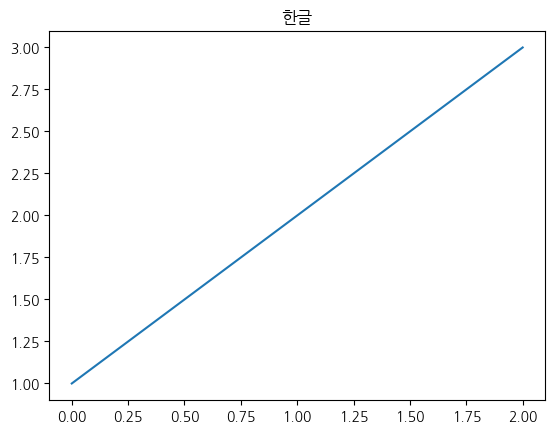

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [11]:
train_holiday_re = train[train['holiday'] == 1]['registered'].reset_index(drop=True)
train_holiday_ca = train[train['holiday'] == 1]['casual'].reset_index(drop=True)
train_workingday_re = train[train['workingday'] == 1]['registered'].reset_index(drop=True)
train_workingday_ca = train[train['workingday'] == 1]['casual'].reset_index(drop=True)

In [12]:
train_holiday_re

0       16
1       15
2        8
3        2
4        2
      ... 
306    323
307    273
308    145
309    100
310     62
Name: registered, Length: 311, dtype: int64

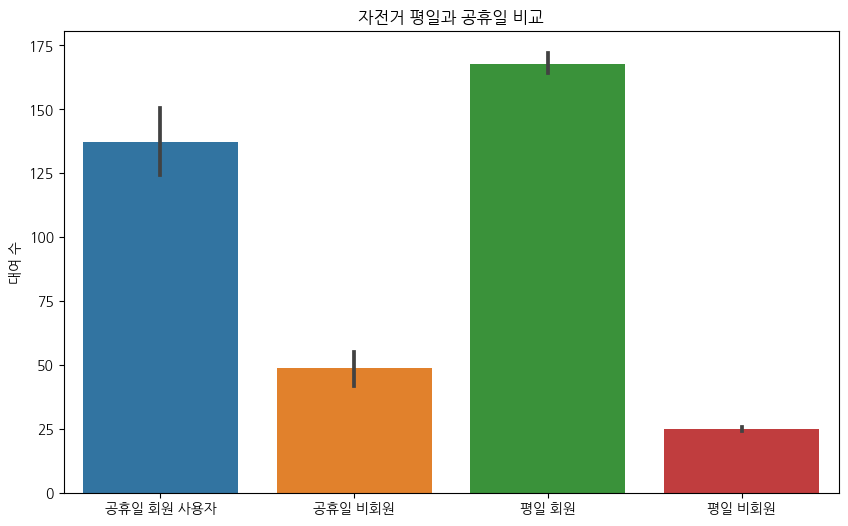

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
data = {
    '공휴일 회원 사용자': train_holiday_re,
    '공휴일 비회원': train_holiday_ca,
    '평일 회원': train_workingday_re,
    '평일 비회원': train_workingday_ca
}

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(data))
plt.title('자전거 평일과 공휴일 비교')
plt.ylabel('대여 수')
plt.show()

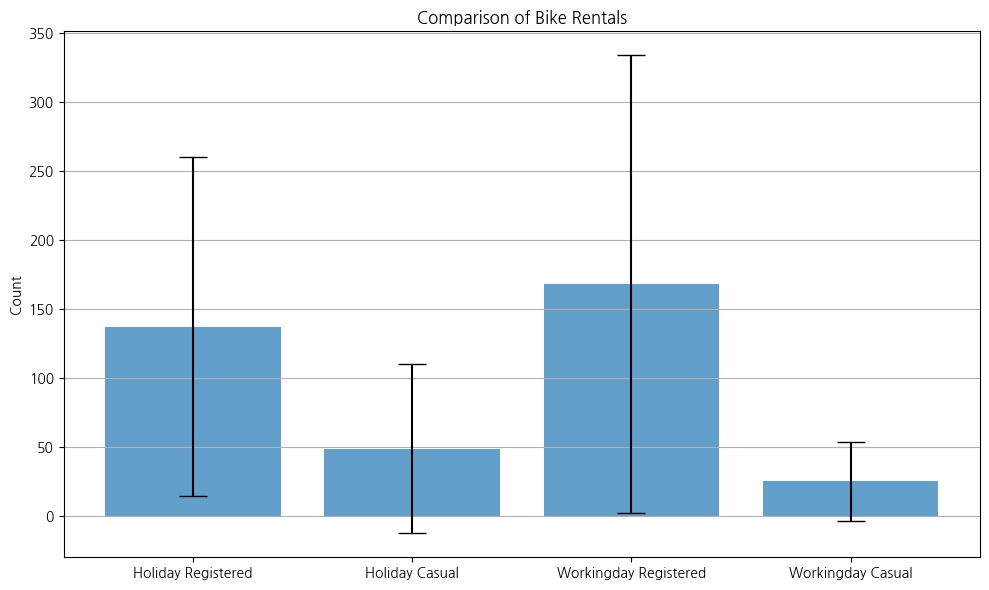

In [14]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Holiday Registered', 'Holiday Casual', 'Workingday Registered', 'Workingday Casual']

# 각 데이터의 평균과 표준편차를 계산합니다.
means = [train_holiday_re.mean(), train_holiday_ca.mean(), train_workingday_re.mean(), train_workingday_ca.mean()]
stds = [train_holiday_re.std(), train_holiday_ca.std(), train_workingday_re.std(), train_workingday_ca.std()]

fig, ax = plt.subplots(figsize=(10, 6))

# 막대그래프를 그립니다.
ax.bar(labels, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_ylabel('Count')
ax.set_title('Comparison of Bike Rentals')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

## 탐색적 데이터 분석
- 머신러닝을 진행할 때 왜 하냐?
- 머신러닝
  + 예측을 하기 위한 방법론
- 최신 알고리즘이 있으니까, 그거 쓰면 다 되는거 아니에요?
  + 머신러닝 예측 3줄이면 끝나잖아요!(?)

- 시각화를 작성해서 얻고자 하는 목적!

탐색적 데이터 분석<==> Feature Engineering(피처 엔지니어링)

피처엔지니어링 ==> 머신러닝 알고리즘에 적용할 독립변수를 찾아서 넣어주는 것

==> 미래 예측을 한다고 할 뎨, 필요한 독립변수는 최소 몇개가 필요할까?'

y=ax # 최소 1개만 있으면 된다.

- 그러면 각 독립변수의 기울기를 찾는 것이 머신러닝이고, 그 독립변수를 추리는 게 탐색적 데이터 분석인가요?

- 정형데이터 컬럼이 존재하고, 그걸 추리는건 ==> 사람 ==> 머신러닝
- 비정형데이터 이미지, 영상 그걸 추리는 걸 ==> 알고리즘 ==> 딥러닝


질문 2개

--> 머신러닝 input 변수를 어떤식으로 선정하셨나요?

--> 머신러닝 input 변수를 몇개 사용하셨나요?

<Axes: xlabel='count', ylabel='Count'>

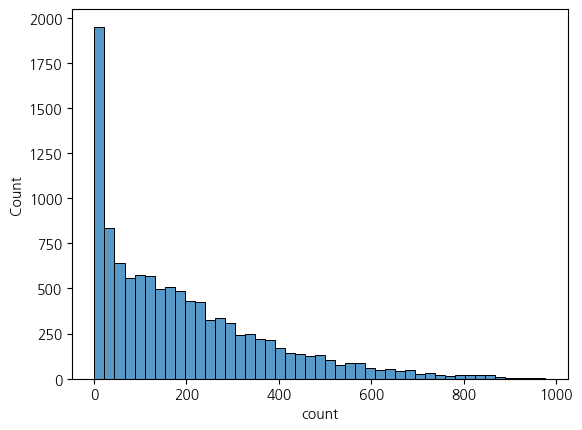

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.histplot(train['count'])

<Axes: xlabel='count', ylabel='Count'>

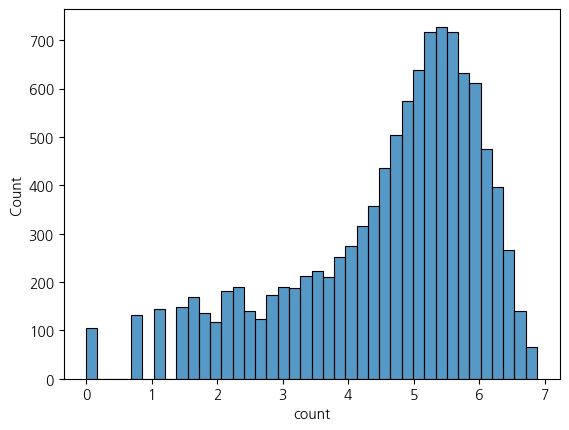

In [17]:
sns.histplot(np.log(train['count'])) # 정규그래프 형태로 바꾸기위해 로그를 취한다

- 첫번째 작업 완료
  + 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
  + 로그변환을 하면, 예측을 하면, 로그변환된 값을 예측
  + 로그변환된 값을 지수변환으로 변경해서 최종예측

## 막대 그래프

In [18]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


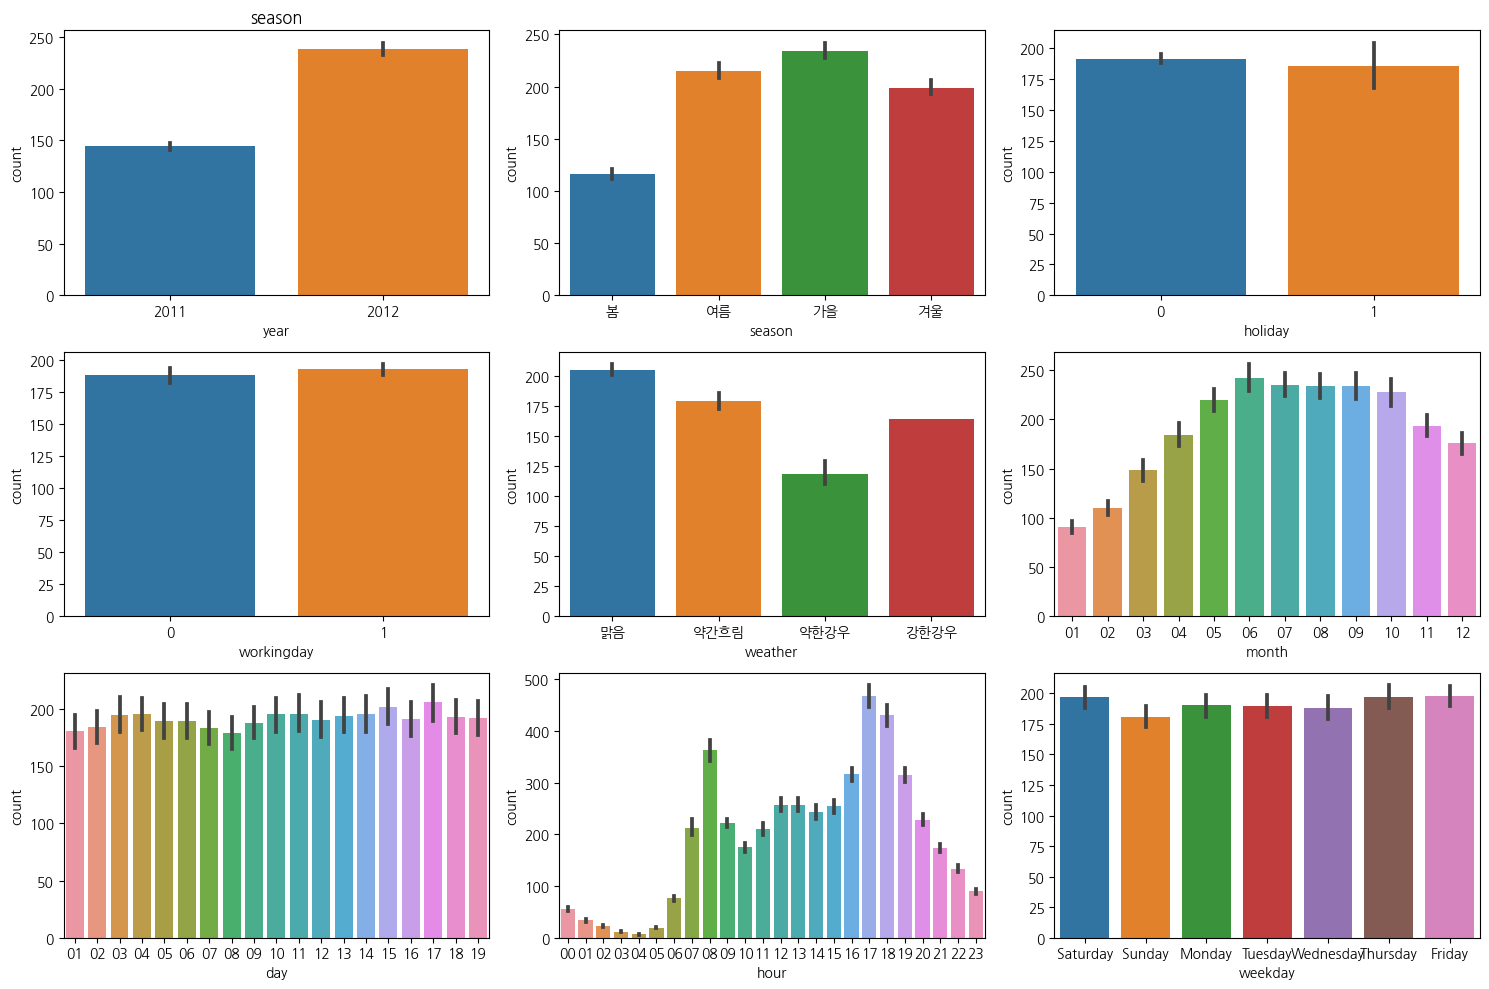

In [23]:
fig, ax = plt.subplots(nrows = 3 , ncols=3, figsize=(15,10))
sns.barplot(x='year',y = 'count', data = train,ax=ax[0,0])
ax[0,0].set_title("year")
sns.barplot(x='season',y = 'count', data = train,ax=ax[0,1])
ax[0,0].set_title("season")
sns.barplot(x='holiday',y = 'count', data = train,ax=ax[0,2])
sns.barplot(x='workingday',y = 'count', data = train,ax=ax[1,0])
sns.barplot(x='weather',y = 'count', data = train,ax=ax[1,1])
sns.barplot(x='month',y = 'count', data = train,ax=ax[1,2])
sns.barplot(x='day',y = 'count', data = train,ax=ax[2,0])
sns.barplot(x='hour',y = 'count', data = train,ax=ax[2,1])
sns.barplot(x='weekday',y = 'count', data = train,ax=ax[2,2])
plt.tight_layout()
plt.show()

In [25]:
test['date'] = test['datetime'].apply(lambda x: x.split()[0])  # 날짜 부분만 분리
test['year'] = test['date'].apply(lambda x: x.split('-')[0])  # 연도 부분만 분리
test['month'] = test['date'].apply(lambda x: x.split('-')[1])  # 월 부분만 분리
test['day'] = test['date'].apply(lambda x: x.split('-')[2])  # 일 부분만 분리

# 시간 부분을 분리
test['hour'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[0])  # 시간 부분만 분리
test['minute'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[1])  # 분 부분만 분리
test['second'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[2])  # 초 부분만 분리

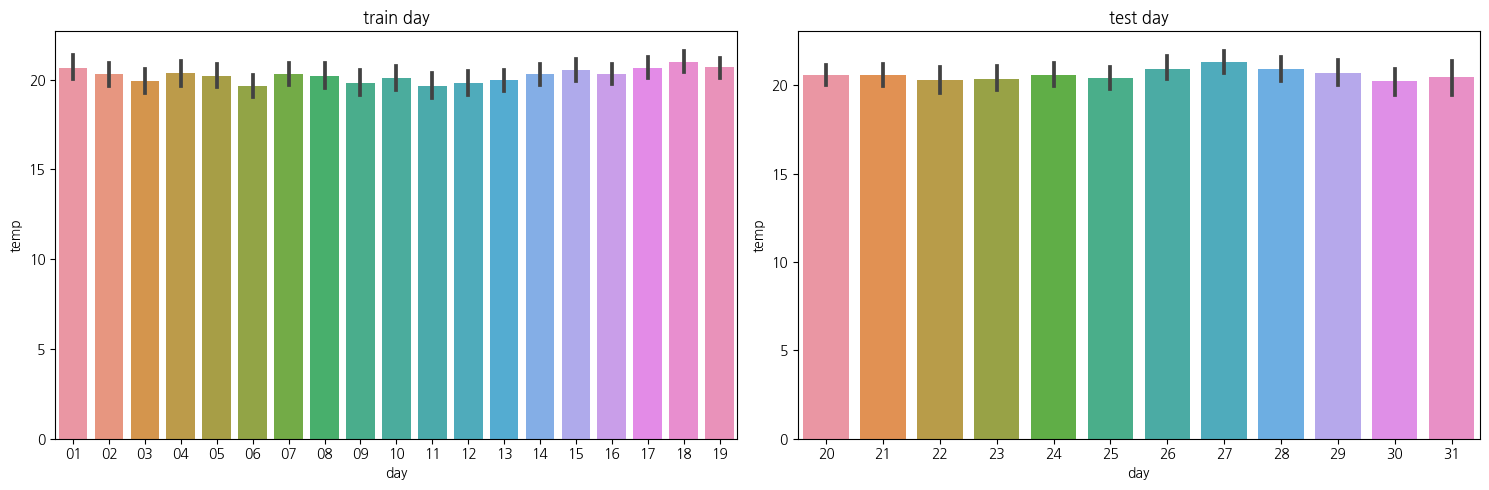

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
sns.barplot(x = 'day', y = 'temp', data = train, ax = ax[0])
ax[0].set_title("train day")

sns.barplot(x = 'day', y = 'temp', data = test, ax = ax[1])
ax[1].set_title("test day")

plt.tight_layout()
plt.show()

- day 컬럼은 제외!! 이유 train 1~19, test 20~31
  + 참조할만한 날짜가 훈련데이터에 존재하지 않음

## second, minute 컬럼은 제거
- 아무런 정보가 없음

## boxplot
- season , weather, holiday, weekday
- 2 x 2 배열이 나오도록

In [30]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,04,00,00


In [32]:
test['weekday'] = test['date'].apply(lambda x: calendar.day_name[datetime.datetime.strptime(x, '%Y-%m-%d').weekday()])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,03,00,00,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,04,00,00,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,19,00,00,Monday
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,20,00,00,Monday
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,21,00,00,Monday
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012-12-31,2012,12,31,22,00,00,Monday


In [35]:
# season
test['season'] = test['season'].map({1:"봄",2:"여름",3:"가을",4:"겨울"})
# weather
test['weather'] = test['weather'].map({1:"맑음",2:"약간흐림",3:"약한강우",4:"강한강우"})
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second,weekday
0,2011-01-20 00:00:00,봄,0,1,맑음,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00,Thursday


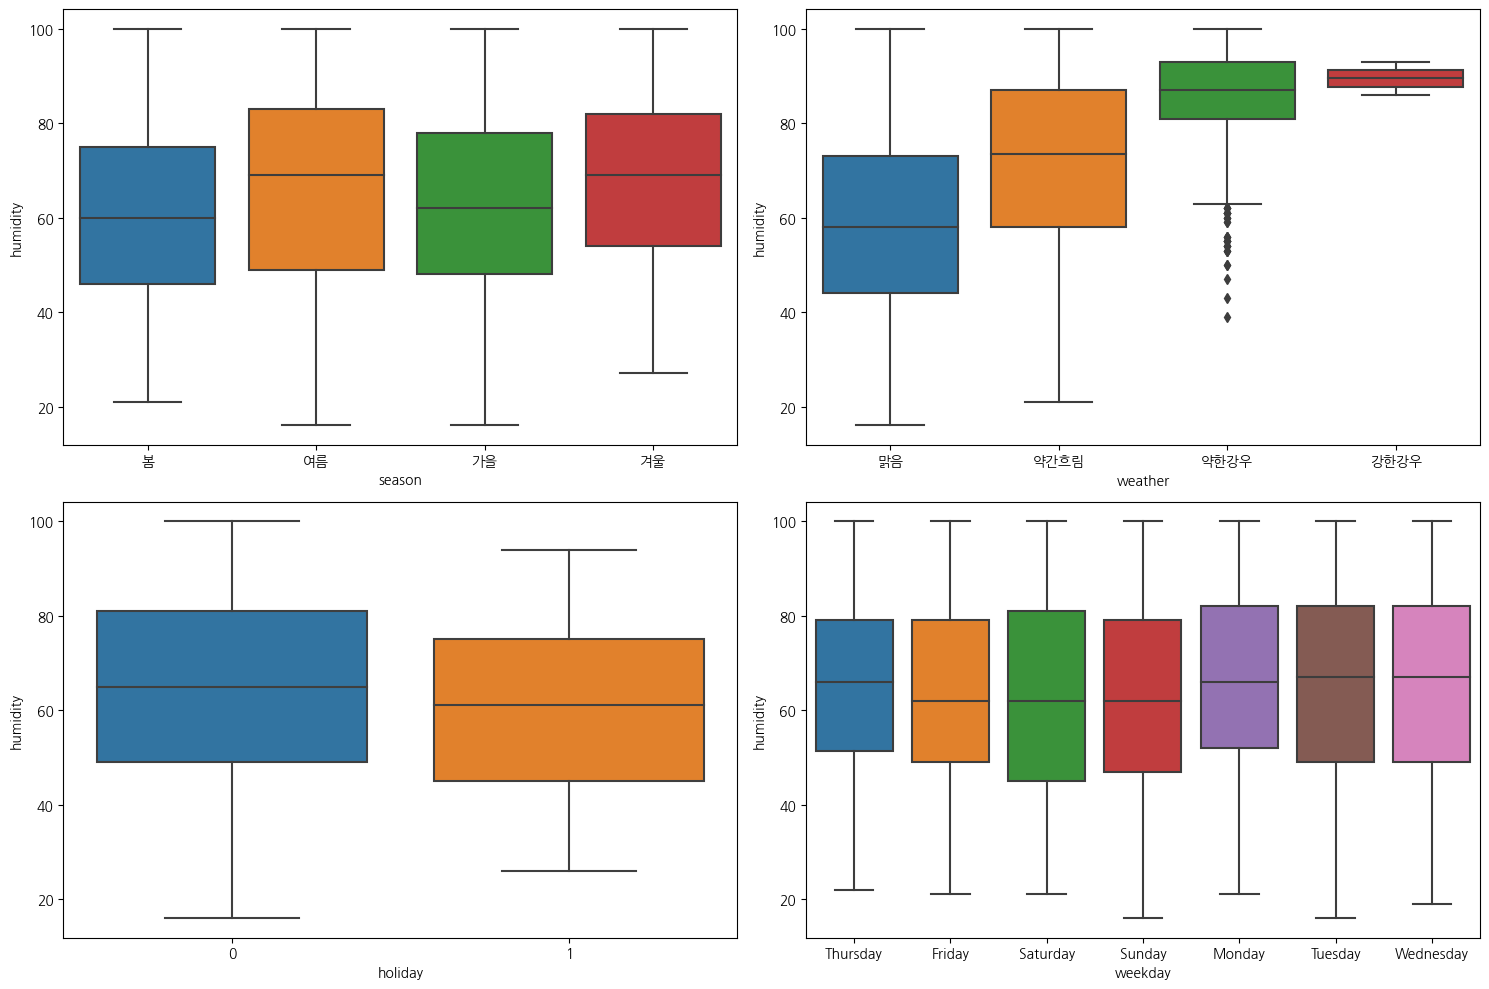

In [38]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))
sns.boxplot(x='season', y = 'humidity',data = test, ax=ax[0,0])
sns.boxplot(x='weather', y = 'humidity',data = test, ax=ax[0,1])
sns.boxplot(x='holiday', y = 'humidity',data = test, ax=ax[1,0])
sns.boxplot(x='weekday', y = 'humidity',data = test, ax=ax[1,1])
plt.tight_layout()
plt.show()

## point

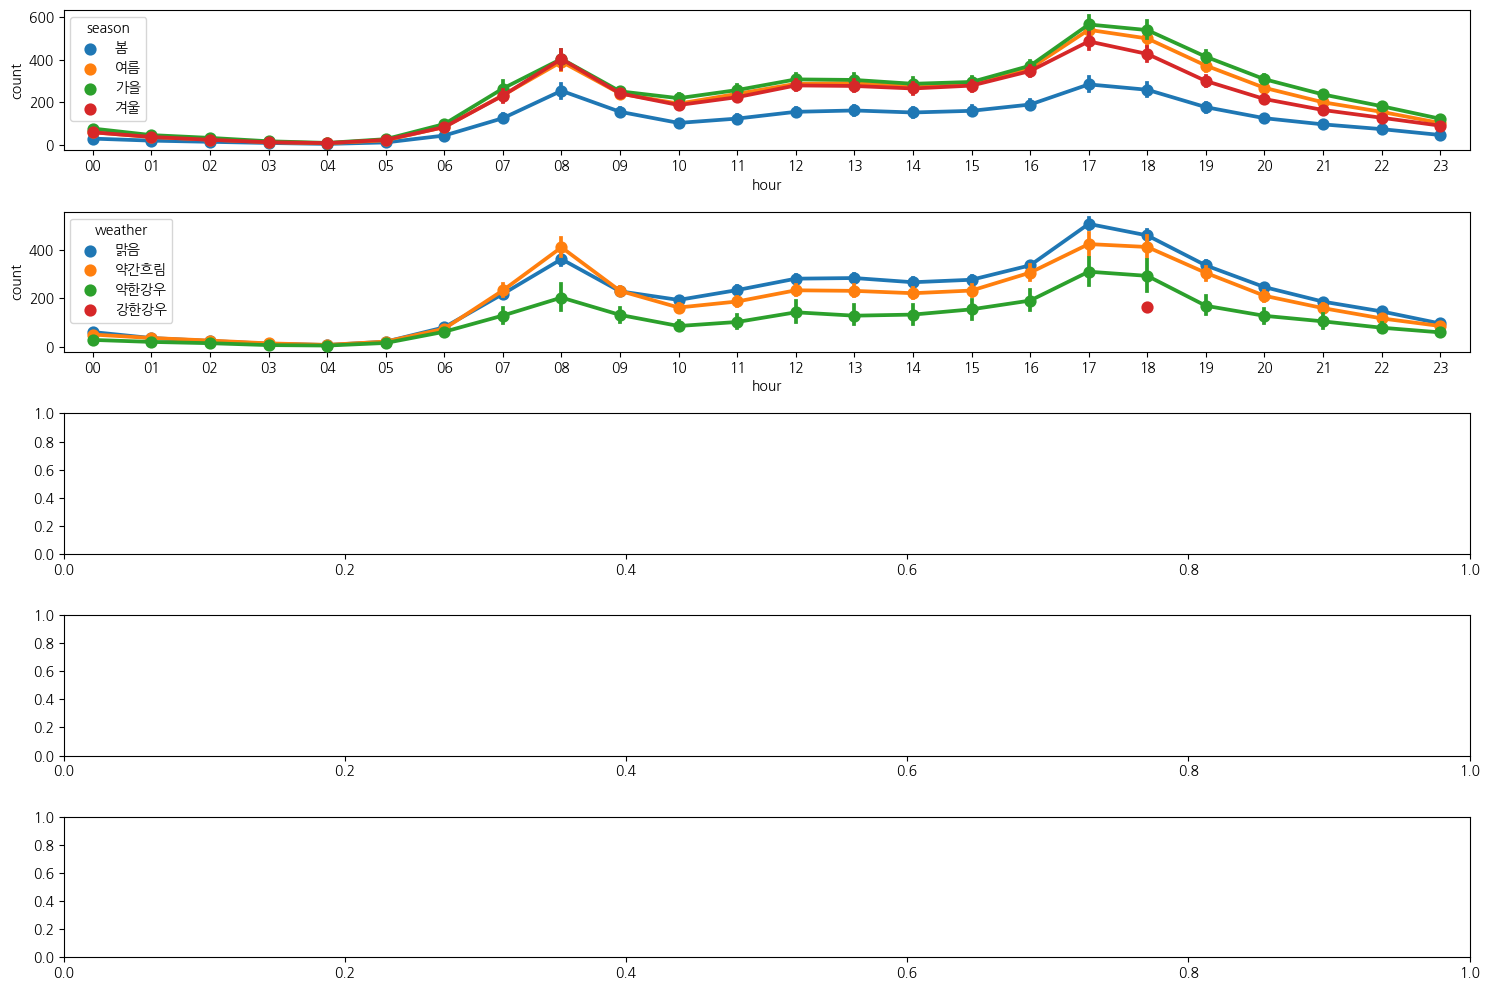

In [46]:
fig, ax = plt.subplots(nrows =5,figsize=(15,10))

sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = train, ax=ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = train, ax=ax[1])
plt.tight_layout()
plt.show()

## 강한 강우가 포함된 행은 제거 Task

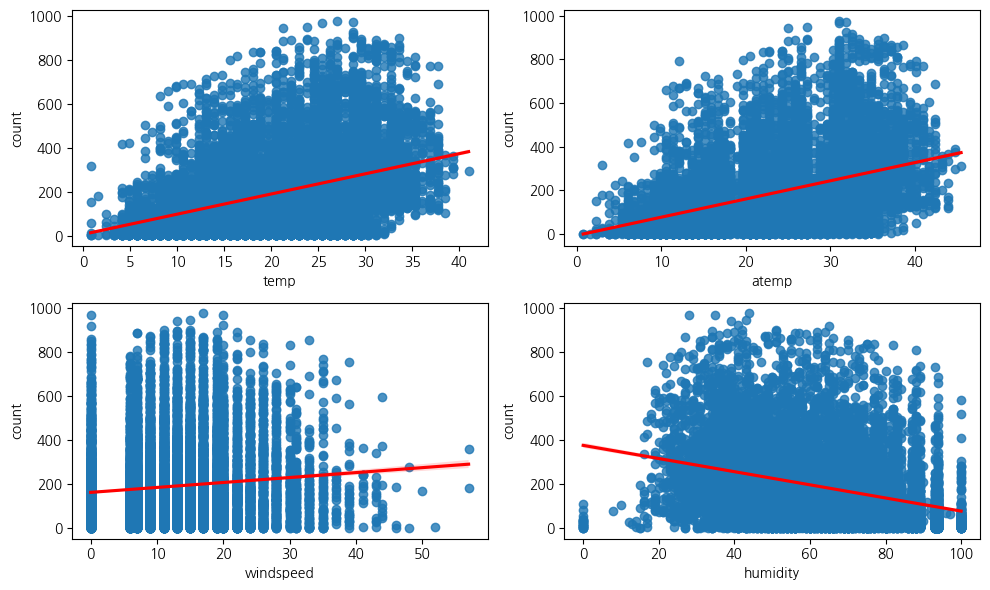

In [47]:
# 회귀식 산점도
# regplot() 사용
# 2 x 2

fig, ax = plt.subplots(nrows =2 , ncols =2 , figsize = (10, 6))

sns.regplot(x = 'temp' , y = 'count', data = train, ax = ax[0,0], line_kws={'color' : 'red'})
sns.regplot(x = 'atemp' , y = 'count', data = train, ax = ax[0,1], line_kws={'color' : 'red'})
sns.regplot(x = 'windspeed' , y = 'count', data = train, ax = ax[1,0], line_kws={'color' : 'red'})
sns.regplot(x = 'humidity' , y = 'count', data = train, ax = ax[1,1], line_kws={'color' : 'red'})

plt.tight_layout()
plt.show()

- temp, humidity 컬럼만 쓰겠다

## 최종적인 input 변수 선정

In [ ]:
cols = ['', '', '']

final_df = train.loc[train['weather']=="강한강우",cols]
# 탐색적 데이터 분석이 끝난 데이터가